In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r"C:\Users\veeru\Documents\MyNotebook\Bengaluru_House_Data.csv")
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [3]:
df.nunique()

area_type          4
availability      81
location        1305
size              31
society         2688
total_sqft      2117
bath              19
balcony            4
price           1994
dtype: int64

In [4]:
#Removing unwanted columns
df_1 = df.drop(["area_type", "availability","society"], axis = 1)
df_1

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13316,Richards Town,4 BHK,3600,5.0,NaN,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00


In [5]:
df_1.isna().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [6]:
#Removing Null values
df_2 = df_1.dropna()
df_2.isna().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [7]:
df_2["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 BHK', '1 RK',
       '4 BHK', '1 Bedroom', '2 Bedroom', '6 Bedroom', '8 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '11 Bedroom', '43 Bedroom',
       '14 BHK', '8 BHK', '12 Bedroom', '10 Bedroom', '13 BHK'],
      dtype=object)

In [8]:
#Removing char in bedroom size...
size_n = df_2["size"]
size_n

0            2 BHK
1        4 Bedroom
2            3 BHK
3            3 BHK
4            2 BHK
           ...    
13314        3 BHK
13315    5 Bedroom
13317        2 BHK
13318        4 BHK
13319        1 BHK
Name: size, Length: 12710, dtype: object

In [9]:
size_num = []
for i in size_n:
    txt = str(i)
    s = txt.split()
    size_num.append(int(s[0]))

df_2["Bedroom"] = size_num
df_3 = df_2.drop(["size"], axis=1)
df_3

<ipython-input-9-cbcaeee4c3d1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2["Bedroom"] = size_num


,location,total_sqft,bath,balcony,price,Bedroom
0,Electronic City Phase II,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600,5.0,3.0,120.00,4
2,Uttarahalli,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521,3.0,1.0,95.00,3
4,Kothanur,1200,2.0,1.0,51.00,2
...,...,...,...,...,...,...
13314,Green Glen Layout,1715,3.0,3.0,112.00,3
13315,Whitefield,3453,4.0,0.0,231.00,5
13317,Raja Rajeshwari Nagar,1141,2.0,1.0,60.00,2
13318,Padmanabhanagar,4689,4.0,1.0,488.00,4


In [10]:
#Locations change few(less) to Others
df_3["location"].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [11]:
loc = df_3.groupby(["location"]).size().sort_values(ascending=False)

In [12]:
for l,c in loc.items():
    if c < 100:
        df_3["location"].mask(df_3["location"] == l, "Others", inplace=True)
df_3

,location,total_sqft,bath,balcony,price,Bedroom
0,Electronic City Phase II,1056,2.0,1.0,39.07,2
1,Others,2600,5.0,3.0,120.00,4
2,Uttarahalli,1440,2.0,3.0,62.00,3
3,Others,1521,3.0,1.0,95.00,3
4,Others,1200,2.0,1.0,51.00,2
...,...,...,...,...,...,...
13314,Others,1715,3.0,3.0,112.00,3
13315,Whitefield,3453,4.0,0.0,231.00,5
13317,Raja Rajeshwari Nagar,1141,2.0,1.0,60.00,2
13318,Others,4689,4.0,1.0,488.00,4


In [13]:
df_3["location"].unique()

array(['Electronic City Phase II', 'Others', 'Uttarahalli', 'Whitefield',
       'Marathahalli', '7th Phase JP Nagar', 'Raja Rajeshwari Nagar',
       'Thanisandra', 'Electronic City', 'Yelahanka', 'Hebbal',
       'Kanakpura Road', 'Sarjapur  Road', 'Haralur Road', 'Hennur Road',
       'Bannerghatta Road'], dtype=object)

In [14]:
#Calculate Average if there is range for Sqft
sqft = []
sqft = df_3["total_sqft"]

In [15]:
def splitString(strg):
    num = ""
    for i in range(len(strg)):
        if (strg[i].isdigit()):
            num = num+ strg[i]
    return(num)

sq_ft = []
for i in sqft:
    inp = i
#    print (inp)
    txt = str(inp)
    s = txt.split()
    if isinstance(inp, float) == True:
        sq_ft.append(inp)
    elif isinstance(inp, int) == True:
        sq_ft.append(inp)
    elif len(s) > 1 and s[1] == '-':
        avg = (float(s[0]) + float(s[2]))/2
        sq_ft.append(avg)
    else:
        nm = splitString(s[0])
        sq_ft.append(nm)

df_3["Area"] = sq_ft
df_4 = df_3.drop(["total_sqft"], axis = 1)
df_4

,location,bath,balcony,price,Bedroom,Area
0,Electronic City Phase II,2.0,1.0,39.07,2,1056
1,Others,5.0,3.0,120.00,4,2600
2,Uttarahalli,2.0,3.0,62.00,3,1440
3,Others,3.0,1.0,95.00,3,1521
4,Others,2.0,1.0,51.00,2,1200
...,...,...,...,...,...,...
13314,Others,3.0,3.0,112.00,3,1715
13315,Whitefield,4.0,0.0,231.00,5,3453
13317,Raja Rajeshwari Nagar,2.0,1.0,60.00,2,1141
13318,Others,4.0,1.0,488.00,4,4689


In [16]:
def convert_sqft_to_num(x):
    try:
        return float(x)
    except:
        return None 
#df4 = df_new.copy()
df_4["Area"]=df_4["Area"].apply(convert_sqft_to_num)
df_4

,location,bath,balcony,price,Bedroom,Area
0,Electronic City Phase II,2.0,1.0,39.07,2,1056.0
1,Others,5.0,3.0,120.00,4,2600.0
2,Uttarahalli,2.0,3.0,62.00,3,1440.0
3,Others,3.0,1.0,95.00,3,1521.0
4,Others,2.0,1.0,51.00,2,1200.0
...,...,...,...,...,...,...
13314,Others,3.0,3.0,112.00,3,1715.0
13315,Whitefield,4.0,0.0,231.00,5,3453.0
13317,Raja Rajeshwari Nagar,2.0,1.0,60.00,2,1141.0
13318,Others,4.0,1.0,488.00,4,4689.0


In [17]:
#Outliers
from matplotlib import pyplot as plt

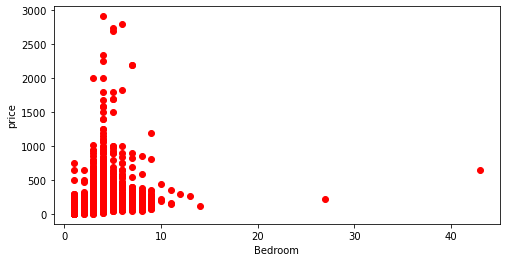

In [18]:
plt.figure(figsize=(8,4))
plt.xlabel("Bedroom")
plt.ylabel("price")
plt.scatter(df_4.Bedroom,df_4.price,c="red")
plt.show()

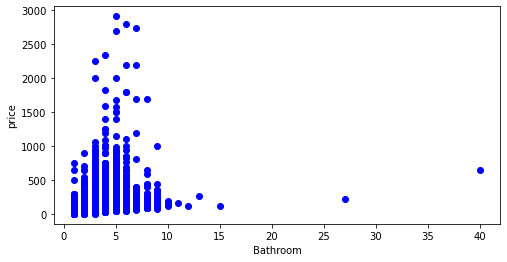

In [19]:
plt.figure(figsize=(8,4))
plt.xlabel("Bathroom")
plt.ylabel("price")
plt.scatter(df_4.bath,df_4.price,c="blue")
plt.show()

In [20]:
df_4.drop(df_4[df_4['Bedroom'] > 20].index, inplace = True)
df_4.drop(df_4[df_4['bath'] > 15].index, inplace = True)
df_4.shape

(12708, 6)

In [21]:
df_4["Area_by_BR"] = df_4["Area"]/df_4["Bedroom"]
df_4["Price_by_BR"] = df_4["price"]/df_4["Bedroom"]
df_4

,location,bath,balcony,price,Bedroom,Area,Area_by_BR,Price_by_BR
0,Electronic City Phase II,2.0,1.0,39.07,2,1056.0,528.000000,19.535000
1,Others,5.0,3.0,120.00,4,2600.0,650.000000,30.000000
2,Uttarahalli,2.0,3.0,62.00,3,1440.0,480.000000,20.666667
3,Others,3.0,1.0,95.00,3,1521.0,507.000000,31.666667
4,Others,2.0,1.0,51.00,2,1200.0,600.000000,25.500000
...,...,...,...,...,...,...,...,...
13314,Others,3.0,3.0,112.00,3,1715.0,571.666667,37.333333
13315,Whitefield,4.0,0.0,231.00,5,3453.0,690.600000,46.200000
13317,Raja Rajeshwari Nagar,2.0,1.0,60.00,2,1141.0,570.500000,30.000000
13318,Others,4.0,1.0,488.00,4,4689.0,1172.250000,122.000000


In [22]:
df_4.drop(df_4[df_4['Area_by_BR'] < 300].index, inplace = True)
df_4

,location,bath,balcony,price,Bedroom,Area,Area_by_BR,Price_by_BR
0,Electronic City Phase II,2.0,1.0,39.07,2,1056.0,528.000000,19.535000
1,Others,5.0,3.0,120.00,4,2600.0,650.000000,30.000000
2,Uttarahalli,2.0,3.0,62.00,3,1440.0,480.000000,20.666667
3,Others,3.0,1.0,95.00,3,1521.0,507.000000,31.666667
4,Others,2.0,1.0,51.00,2,1200.0,600.000000,25.500000
...,...,...,...,...,...,...,...,...
13314,Others,3.0,3.0,112.00,3,1715.0,571.666667,37.333333
13315,Whitefield,4.0,0.0,231.00,5,3453.0,690.600000,46.200000
13317,Raja Rajeshwari Nagar,2.0,1.0,60.00,2,1141.0,570.500000,30.000000
13318,Others,4.0,1.0,488.00,4,4689.0,1172.250000,122.000000


In [23]:
df_4["price_per_sqft"]=df_4["price"]*1000000/df_4["Area"]
df_4

,location,bath,balcony,price,Bedroom,Area,Area_by_BR,Price_by_BR,price_per_sqft
0,Electronic City Phase II,2.0,1.0,39.07,2,1056.0,528.000000,19.535000,36998.106061
1,Others,5.0,3.0,120.00,4,2600.0,650.000000,30.000000,46153.846154
2,Uttarahalli,2.0,3.0,62.00,3,1440.0,480.000000,20.666667,43055.555556
3,Others,3.0,1.0,95.00,3,1521.0,507.000000,31.666667,62458.908613
4,Others,2.0,1.0,51.00,2,1200.0,600.000000,25.500000,42500.000000
...,...,...,...,...,...,...,...,...,...
13314,Others,3.0,3.0,112.00,3,1715.0,571.666667,37.333333,65306.122449
13315,Whitefield,4.0,0.0,231.00,5,3453.0,690.600000,46.200000,66898.349262
13317,Raja Rajeshwari Nagar,2.0,1.0,60.00,2,1141.0,570.500000,30.000000,52585.451358
13318,Others,4.0,1.0,488.00,4,4689.0,1172.250000,122.000000,104073.363190


In [24]:
mn = np.mean(df_4.price_per_sqft)
mn

61497.15291604331

In [25]:
df_4["price_per_sqft"].mean()

61497.15291604331

In [27]:
# Find Std, deviation and then drop...
df_5=pd.DataFrame()
for key, subdf in df_4.groupby("location"):
    mn=np.mean(subdf.price_per_sqft)
    std=np.std(subdf.price_per_sqft)
    reduced_df=subdf[(subdf.price_per_sqft>(mn-std))&(subdf.price_per_sqft<=(mn+std))]
    df_5=pd.concat([df_5,reduced_df],ignore_index=True)
df_5

,location,bath,balcony,price,Bedroom,Area,Area_by_BR,Price_by_BR,price_per_sqft
0,7th Phase JP Nagar,2.0,2.0,72.00,2,1080.0,540.000000,36.000000,66666.666667
1,7th Phase JP Nagar,2.0,2.0,93.00,2,1270.0,635.000000,46.500000,73228.346457
2,7th Phase JP Nagar,2.0,1.0,100.00,3,1420.0,473.333333,33.333333,70422.535211
3,7th Phase JP Nagar,3.0,1.0,150.00,3,1850.0,616.666667,50.000000,81081.081081
4,7th Phase JP Nagar,2.0,1.0,94.00,2,1245.0,622.500000,47.000000,75502.008032
...,...,...,...,...,...,...,...,...,...
10555,Yelahanka,2.0,1.0,48.72,3,1282.0,427.333333,16.240000,38003.120125
10556,Yelahanka,2.0,1.0,55.00,2,1180.0,590.000000,27.500000,46610.169492
10557,Yelahanka,3.0,1.0,78.00,2,1267.0,633.500000,39.000000,61562.746646
10558,Yelahanka,2.0,1.0,78.19,2,1360.0,680.000000,39.095000,57492.647059


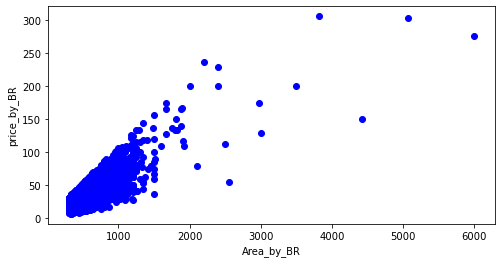

In [28]:
plt.figure(figsize=(8,4))
plt.xlabel("Area_by_BR")
plt.ylabel("price_by_BR")
plt.scatter(df_5.Area_by_BR,df_5.Price_by_BR, c="blue")
plt.show()

In [29]:
dummies = pd.get_dummies(df_5.location)
dummies

,7th Phase JP Nagar,Bannerghatta Road,Electronic City,Electronic City Phase II,Haralur Road,Hebbal,Hennur Road,Kanakpura Road,Marathahalli,Others,Raja Rajeshwari Nagar,Sarjapur Road,Thanisandra,Uttarahalli,Whitefield,Yelahanka
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10555,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
10556,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
10557,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
10558,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [30]:
df_merge = pd.concat([df_5,dummies], axis=1)
df_final = df_merge.drop(["location", "Others","Area_by_BR", "Price_by_BR", "price_per_sqft" ], axis = 1)
df_final

,bath,balcony,price,Bedroom,Area,7th Phase JP Nagar,Bannerghatta Road,Electronic City,Electronic City Phase II,Haralur Road,Hebbal,Hennur Road,Kanakpura Road,Marathahalli,Raja Rajeshwari Nagar,Sarjapur Road,Thanisandra,Uttarahalli,Whitefield,Yelahanka
0,2.0,2.0,72.00,2,1080.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2.0,2.0,93.00,2,1270.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2.0,1.0,100.00,3,1420.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3.0,1.0,150.00,3,1850.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2.0,1.0,94.00,2,1245.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10555,2.0,1.0,48.72,3,1282.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
10556,2.0,1.0,55.00,2,1180.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
10557,3.0,1.0,78.00,2,1267.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
10558,2.0,1.0,78.19,2,1360.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [31]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn import preprocessing
from xgboost.sklearn import XGBRegressor

In [49]:
X = df_final.drop(["price"], axis = 1)
y = df_final.price

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [68]:
model = LinearRegression()

In [69]:
model.fit(X_train, y_train)

LinearRegression()

In [70]:
model.score(X_test, y_test)

0.842669548551864

In [71]:
model.score(X_train, y_train)

0.7877166535564143

In [72]:
lasso_model = linear_model.Lasso(alpha = 50, max_iter = 100, tol = 0.1)
lasso_model.fit(X_train, y_train)

Lasso(alpha=50, max_iter=100, tol=0.1)

In [73]:
lasso_model.score(X_test, y_test)

0.8301985865483354

In [74]:
model_param = {
    'linear_regression' : {
        "model": LinearRegression(),
        "params":{
            'fit_intercept':[True,False],
            'normalize':[True,False],
        }
    },
    'lasso_model' : {
        "model": linear_model.Lasso(),
        "params": {
            'selection': ['random', 'cyclic'],
            'alpha':[1,2,3],
            'max_iter': [10, 50, 100],
            'tol': [0.1]
        }
    },
    'decision_tree': {
        "model" : DecisionTreeRegressor(),
        "params": {
            'criterion':['mse', 'friedman_mse'],
            'splitter': ['best', 'random']
        }
    },
    'random_forest':{
        "model": RandomForestRegressor(),
        "params":{
            'n_estimators': [10,20,500],
            'max_depth': [2,4,6,8],
        }
    },
    'ridge_reg':{
        "model": Ridge(),
        "params":{
            'alpha':[0.1, 0.3, 0.5, 0.7, 0.9]
        }
    },
    'xgb_reg': {
        "model": XGBRegressor(),
        "params": {
              'n_estimators':[100,200,300]
        }
    }   
}

In [75]:
model_param1 = {
    'linear_regression' : {
        "model": LinearRegression(),
        "params":{
            'fit_intercept':[True,False],
            'normalize':[True,False],
        }
    },
    'lasso_model' : {
        "model": linear_model.Lasso(),
        "params": {
            'selection': ['random', 'cyclic'],
            'alpha':[1,2,3],
            'max_iter': [10, 50, 100],
            'tol': [0.1]
        }
    },
    'decision_tree': {
        "model" : DecisionTreeRegressor(),
        "params": {
            'criterion':['mse', 'friedman_mse'],
            'splitter': ['best', 'random']
        }
    }
}

In [76]:
scores = []
for model_name, mp in model_param.items():
    clf = GridSearchCV(mp["model"],mp["params"],cv = 5, return_train_score = False)
    clf.fit(X_train, y_train)
    scores.append({
        "model": model_name,
        "best_score": clf.best_score_,
        "best_params": clf.best_params_
    })
df_s = pd.DataFrame(scores, columns = ["model", "best_score", "best_params"])
df_s

C:\Users\veeru\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2781171.578111079, tolerance: 2356453.897635897
  model = cd_fast.enet_coordinate_descent(


,model,best_score,best_params
0,linear_regression,0.784994,"{'fit_intercept': True, 'normalize': True}"
1,lasso_model,0.775653,"{'alpha': 1, 'max_iter': 10, 'selection': 'ran..."
2,decision_tree,0.676362,"{'criterion': 'friedman_mse', 'splitter': 'ran..."
3,random_forest,0.790250,"{'max_depth': 8, 'n_estimators': 500}"
4,ridge_reg,0.784999,{'alpha': 0.9}
5,xgb_reg,0.771805,{'n_estimators': 100}


In [85]:
model = LinearRegression(fit_intercept= True, normalize= True)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8426695485518673

In [86]:
model1 = RandomForestRegressor(max_depth= 8, n_estimators= 500)
model1.fit(X_train,y_train)
model1.score(X_test,y_test)

0.7457572220693451

In [87]:
import joblib

In [88]:
joblib.dump(model, "model_jl")

['model_jl']

In [89]:
joblibmodel = joblib.load("model_jl")

In [90]:
joblibmodel.predict(X_test)

array([ 23.00405857,  83.55308285,  55.56184418, ...,  85.51932234,
        52.22945182, 149.21021312])

In [91]:
joblibmodel.score(X_test,y_test)

0.8426695485518673